# R kernel

In [2]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(rstatix)
library(ggrepel)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(CellChat)
})

In [3]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.08,0,0.08,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.08,0,0.08, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=5,color="black"),
    legend.title=element_text(size=5,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=7),
    panel.border = element_rect(linewidth=0.25,color="black"),
    panel.grid = element_blank()
)
}

In [4]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ABC","B_IFN","B_STR","B_preGC","Plasma")
Myeloid_celltype_order = c("Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC")
subtype_order = c(Tcells_celltype_order, Bcells_celltype_order, Myeloid_celltype_order)

In [5]:
celltype_color = c(
    "T cells" = "#63FFAC",
    "B cells" = "#FF34FF",
    "Plasma cells" ="#FF7F0EFF",
    "Macrophage/DC" = "#008941"
)

## Fig.5B

In [6]:
REO = read.csv("Immune_subtype_ROE.csv",head=T, row.names=1)
REO <- REO[match(subtype_order,rownames(REO)),]

In [7]:
rownames(REO) = gsub("B_ATM","B_ABC", rownames(REO))
rownames(REO) = gsub("B_GC","B_preGC", rownames(REO))

In [8]:
write.csv(REO,"Immune_subtype_ROE.csv")

In [9]:
celltype_order <- rep(c("T cells", "B cells", 'Macrophage/DC'), c(9,6,10))

top_annotation = rowAnnotation(
    Celltype = celltype_order, 
    simple_anno_size = unit(3, 'mm'), 
    col = list(Celltype = celltype_color),
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        Celltype = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
) 

Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT

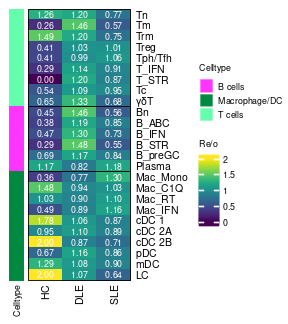

In [10]:
plot = Heatmap(REO,cluster_rows = F, col=viridis::viridis(100),
        cluster_columns = F, 
        use_raster = TRUE,
        heatmap_legend_param = list(
            title = "Re/o",
            legend_height = unit(1, "cm"),
            legend_width = unit(1.5, "cm"),
            annotation_legend_side = "bottom",
            heatmap_legend_side = "bottom",
            labels_gp=gpar(fontsize=5),
            title_gp=gpar(fontsize=5)
        ),
        row_title = NULL,
        left_annotation = top_annotation,
        row_names_gp = gpar(fontsize = 6),
        column_names_gp = gpar(fontsize = 6),
        border_gp = gpar(col = "black", lwd = 0.5),
        row_split = rep(1:3, c(9,6,10)),
        row_gap = unit(0, "mm"),
        cell_fun = function(j, i, x, y, w, h, fill) {
            grid.text(sprintf("%.2f", REO[i, j]), x, y, gp = gpar(fontsize = 5, col="white"))
        }
    )
options(repr.plot.width= 2.4,repr.plot.height = 2.7)
plot

## Fig.5C

In [11]:
immune_metadata = read.csv('immune_nonTLS_TLS_metadata.csv', head=T)
immune_metadata = subset(immune_metadata, group != 'HC')

In [12]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ABC","B_IFN","B_STR","B_preGC") 

In [13]:
all_stats <- immune_metadata %>%
  group_by(TLS_region,sample,subtype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

`summarise()` has grouped output by 'TLS_region', 'sample'. You can override
using the `.groups` argument.


In [14]:
color = c('TLS'='#298c8c', 'Non-TLS'='#f1a226')

sub_data = all_stats[all_stats$subtype %in% c(Tcells_celltype_order,Bcells_celltype_order), ]
sub_data$subtype = factor(sub_data$subtype, levels = c(Tcells_celltype_order,Bcells_celltype_order))

library(rstatix)
stat.test <- sub_data %>% 
group_by(subtype) %>%
wilcox_test(percentage ~ TLS_region,p.adjust.method = "none") 
stat.test <- stat.test %>%
add_xy_position(x='subtype',dodge=0.9)

stat.test$sign = ifelse(stat.test$p > 0.05, "",
                       ifelse(stat.test$p > 0.01 & stat.test$p < 0.05, "*",
                        ifelse(stat.test$p > 0.001 & stat.test$p < 0.01, "**","***")))

In [25]:
stat.test$p.format = sprintf("%.4f", stat.test$p)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

png 
  2

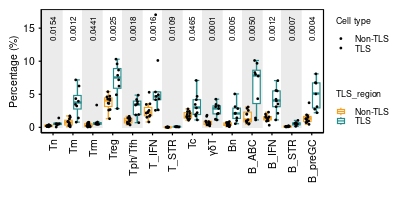

In [33]:
background_colors <- rep(c("lightgray", "white"), length.out = length(c(Tcells_celltype_order,Bcells_celltype_order)))
celltype_bg <- data.frame(
  celltype = levels(sub_data$subtype),
  ymin = -Inf,
  ymax = Inf,
  xmin = 1:length(unique(sub_data$subtype)) - 0.5,
  xmax = 1:length(unique(sub_data$subtype)) + 0.5,
  bg_color = background_colors
)
y_min <- min(sub_data$percentage, na.rm = TRUE)

All_plot = ggplot() + 
    geom_rect(data = celltype_bg,aes(xmin = xmin,xmax = xmax,ymin = y_min,ymax = Inf,fill = bg_color),alpha = 0.3,inherit.aes = FALSE, show.legend = FALSE) +
    scale_fill_manual(values = c('gray' , 'white'),name=NULL) +
    new_scale_fill() +
    stat_boxplot(data = sub_data,aes(x=subtype,y=percentage,color=TLS_region), geom = "errorbar", width=0.5, linewidth=0.25,position=position_dodge(0.9)) +
    geom_boxplot(data = sub_data,aes(x=subtype,y=percentage,color=TLS_region), outlier.shape = NA,size=0.25,position=position_dodge(0.9), outliers = FALSE) +
    geom_point(data = sub_data, aes(x = subtype, y = percentage, fill = TLS_region), size = 0.5, alpha = 1, shape = 19, stroke = NA, color = 'black',position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.9)) + 
    #stat_pvalue_manual(stat.test,y.position=11.5,label = "p.format",label.size=1, remove.bracket = TRUE, position=position_dodge(0.9)) +
    geom_text(
        data = stat.test,
        aes(x = subtype, y = 15, label = p.format),
        angle = 90,
        size = 1.6,
        hjust = 0.5,
        vjust = 0.5,
        position = position_dodge(0.9)
    ) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_color_manual(values=color) +
    mytheme() +
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.5),
         )
options(repr.plot.width= 3.4,repr.plot.height = 1.7)
All_plot

pdf("../../figures/Cellbin_immunecell_subtype_TLS_nonTLS_TB_boxplot.pdf",w=3.4,h=1.6)
All_plot
dev.off()

## Fig.5D

In [50]:
cell_density = read.csv("TLS_each_subtype_density.csv",head=T, row.names=1)
cell_density$TLS = paste0(cell_density$sample,"_", cell_density$TLS_ID)
short_data <- as.data.frame(pivot_wider(cell_density,id_cols=c(TLS), names_from = subtype, values_from = cell_density))

In [51]:
cell_density$subtype = gsub("B_ATM","B_ABC", cell_density$subtype)
cell_density$subtype = gsub("B_GC","B_preGC", cell_density$subtype)

In [52]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ABC","B_IFN","B_preGC","B_STR","Plasma")
subtype_order = c(Tcells_celltype_order, Bcells_celltype_order, 'Others')

cor_result = data.frame()
pval_result = data.frame()
for(i in 1:(length(subtype_order) - 1))
{
    print(subtype_order[i])
    for (j in (i+1):length(subtype_order))
    {
        cor = cor.test(short_data[[subtype_order[i]]],short_data[[subtype_order[j]]],method="spearman")$estimate
        p.val = cor.test(short_data[[subtype_order[i]]],short_data[[subtype_order[j]]],method="spearman", exact = TRUE)$p.value
        cor_value = cbind(subtype_order[i],subtype_order[j], cor)
        cor_result = rbind(cor_result, cor_value)
        pval_value = cbind(subtype_order[i],subtype_order[j], p.val)
        pval_result = rbind(pval_result, pval_value)
    }
}

[1] "Tn"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Tm"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Trm"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Treg"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Tph/Tfh"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "T_IFN"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "T_STR"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Tc"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "γδT"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "Bn"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "B_ABC"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "B_IFN"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”

[1] "B_preGC"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”


[1] "B_STR"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”


[1] "Plasma"


Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(short_data[[subtype_order[i]]], short_data[[subtype_order[j]]], :
“Cannot compute exact p-value with ties”


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x

png 
  2

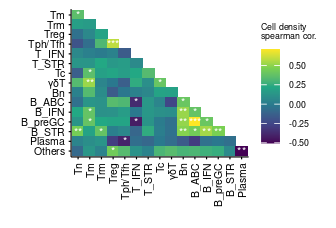

In [53]:
cor_result$cor = as.numeric(cor_result$cor)
cor_result$V1 = factor(cor_result$V1, levels = subtype_order)
cor_result$V2 = factor(cor_result$V2, levels = rev(subtype_order))

pval_result$p.val = as.numeric(pval_result$p.val)
pval_result$adj.val = p.adjust(pval_result$p.val, method='BH')
pval_result$V1 = factor(pval_result$V1, levels = subtype_order)
pval_result$V2 = factor(pval_result$V2, levels = rev(subtype_order))

pval_result$adj.sig = ifelse(pval_result$adj.val < 0.001, '***', 
                      ifelse(pval_result$adj.val < 0.01 & pval_result$adj.val > 0.001,"**",
                      ifelse(pval_result$adj.val < 0.05 & pval_result$adj.val > 0.01,"*","")))

plot = ggplot(cor_result, aes(x=V1, y=V2,fill=cor)) +
geom_tile() + 
geom_text(data=pval_result, aes(label=adj.sig), size=2.2, color='white') + 
scale_fill_viridis_c()+
labs(x="",y="",fill='Cell density\nspearman cor.') +
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
     panel.border = element_blank(),
    legend.key.width=unit(0.4,'cm'),
    legend.key.height=unit(0.4,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"))

options(repr.plot.width =2.8,repr.plot.height =1.9)
plot 

pdf("../../figures/Cluster6_7_cell_density_correlation_heatmap.pdf",w=2.8,h=1.8)
plot
dev.off()

## Fig.5E

In [68]:
dist = read.csv("Cluster6_7_subtype_distance.csv",head=T)

In [69]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ABC","B_IFN","B_preGC","B_STR","Plasma")
Myeloid_celltype_order = c("Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC")
subtype_order = c(Tcells_celltype_order, Bcells_celltype_order,Myeloid_celltype_order)
need_subtype = c(Tcells_celltype_order, Bcells_celltype_order)
need_subtype_others = c(need_subtype,'Others' )

In [70]:
dist$source_subtype[!(dist$source_subtype %in% need_subtype)] = "Others"
dist$target_subtype[!(dist$target_subtype %in% need_subtype)] = "Others"
dist <- dist %>%
  mutate(target_subtype = if_else(source_subtype == "Others" , source_subtype, target_subtype))
dist[dist$source_subtype == "B_STR" & dist$target_subtype == "B_preGC", c("source_subtype", "target_subtype")] <- 
  dist[dist$source_subtype == "B_STR" & dist$target_subtype == "B_preGC", c("target_subtype", "source_subtype")]

In [71]:
dist_mean = dist %>% 
    group_by(source_subtype,target_subtype) %>%
    summarise(mean = median(dist))
dist_mean$mean = dist_mean$mean * 0.5
dist_mean$mean[dist_mean$mean>80] = 80
dist_mean$sig = ifelse(dist_mean$mean<=30, "*", "")
dist_mean$source_subtype = factor(dist_mean$source_subtype, levels=need_subtype_others)
dist_mean$target_subtype = factor(dist_mean$target_subtype, levels=rev(need_subtype_others))

`summarise()` has grouped output by 'source_subtype'. You can override using
the `.groups` argument.


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x

png 
  2

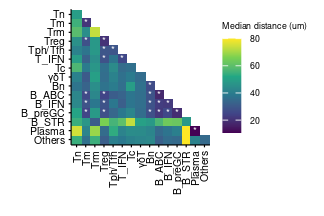

In [73]:
plot = ggplot(dist_mean, aes(x=source_subtype, y=target_subtype, fill=mean)) +
geom_tile() +  
geom_text(aes(label=sig), size=2, color='white') + 
scale_fill_viridis_c()+
labs(x="",y="",fill='Median distance (um)') +
mytheme() +
theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5),
     panel.border = element_blank(),
    legend.key.width=unit(0.4,'cm'),
    legend.key.height=unit(0.4,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt")
     )

options(repr.plot.width =2.7,repr.plot.height =1.8)
plot

pdf("../../figures/Cluster6_7_cell_distance_heatmap.pdf",w=2.7,h=1.8)
plot
dev.off()

## Fig.5G

In [74]:
cell_num_data = read.csv("cell_num_data.csv",head=T)
cell_num_data$ring = cell_num_data$ring/2
need_celltype = c('Tm','Treg','Tph/Tfh','Bn','B_preGC')
cell_num_data = cell_num_data[cell_num_data$subtype %in% need_celltype,]

In [75]:
sum_data = cell_num_data %>% 
    group_by(ring, subtype) %>%
    summarise(sum_count = sum(subtype_num), sum_area = sum(area))
sum_data$cell_density = sum_data$sum_count/sum_data$sum_area
sum_data$subtype = factor(sum_data$subtype, levels=c('Tm','Treg','Tph/Tfh','Bn','B_preGC'))

`summarise()` has grouped output by 'ring'. You can override using the
`.groups` argument.


In [76]:
color = c(
    'Tm' = '#06283d',        
    'Treg' = '#1363df',
    'Tph/Tfh' = '#47b5ff',
    'Bn' = '#5D0E41',
    'B_ABC'= '#FF204E',
    'B_preGC' = 'pink'
    )

png 
  2

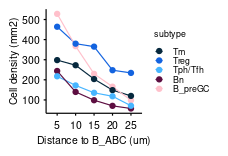

In [94]:
plot = ggline(sum_data, x="ring", y="cell_density",
            color = "subtype",  shape=19, stroke=NA, size=0.25,
            point.size = 0.3) +
labs(x='Distance to B_ABC (um)', y='Cell density (mm2)') +
scale_color_manual(values=color) +
mytheme() +
theme(axis.text.x=element_text(size=6,color="black",angle=0,hjust=0.5,vjust=0.5),
    strip.background=element_rect(linewidth=0.25, color='black', fill="white"),
    panel.spacing = unit(0.15, "cm"),
    legend.position = "right",
    panel.border = element_blank()
    
)
options(repr.plot.width =1.9,repr.plot.height =1.3)
plot

pdf("../../figures/B_ATM_distance_to_other_subtype.pdf",w=1.9,h=1.3)
plot
dev.off()

## Fig.5I

In [107]:
B_ABC_top_TFs = read.csv("B_ABC_top_TFs.csv",head=T, check.names = F, row.names=1)

In [108]:
subtype_order = c('Bn','B_ABC', 'B_IFN','B_STR','B_preGC')
short_data_scale <- as.data.frame(scale(B_ABC_top_TFs))
short_data_scale = short_data_scale[match(subtype_order,rownames(B_ABC_top_TFs)),]

Warning message:
“The input is a data frame-like object, convert it to a matrix.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”


png 
  2

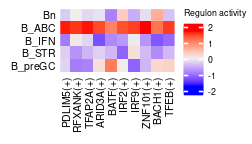

In [109]:
plot = Heatmap(short_data_scale,cluster_rows = F, use_raster = TRUE,
        cluster_columns = F,
        heatmap_legend_param = list(
            title = "Regulon activity",
            legend_height = unit(1, "cm"),
            legend_width = unit(1, "cm"),
            annotation_legend_side = "bottom",
            heatmap_legend_side = "bottom",
            labels_gp=gpar(fontsize=5),
            title_gp=gpar(fontsize=5)
        ),
        row_names_side = "left",
        row_names_gp = gpar(fontsize = 6),
        column_names_gp = gpar(fontsize = 6)
        )
options(repr.plot.width =2.1,repr.plot.height =1.2)
plot

pdf('../../figures/B_ATM_top15TF_merge_AUC.pdf',w=2.1, h=1.2)
plot
dev.off()

## Fig.5L

In [98]:
data = read.csv("B_T_cellchat.csv", head=T)

In [99]:
T_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
B_order = c("Bn","B_ABC","B_IFN","B_preGC","B_STR","Plasma")

data$source <- factor(data$source, levels=c('Tm','Trm','Tph/Tfh','T_STR','Bn',"B_ABC",'B_preGC'))
data$target = factor(data$target, levels=c(T_order,B_order))
data$ligand.receptor = factor(data$ligand.receptor, levels=rev(c("CD80 - CD28",'CD80 - CTLA4',"CD86 - CD28",'CD86 - CTLA4',"CD40LG - CD40","CXCL13 - CXCR5")))

png 
  2

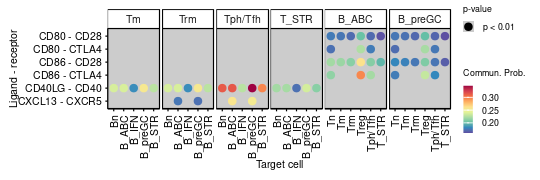

In [106]:
myPalette = rev(brewer.pal(n = 10, name = "Spectral"))

plot <- ggplot(data,aes(x=target, y=ligand.receptor, color=prob, size = pval)) +
geom_point(shape=19,stroke=NA) +
labs(y="Ligand - receptor", x="", color="Commun. Prob.", size="p-value") +
facet_grid(~source, scales="free",space = 'free') +
scale_size(range=c(0,3), breaks=c(3),labels=c("p < 0.01"),guide="legend") + 
scale_color_gradientn(colours = myPalette) +
labs(x='Target cell') +
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
     axis.text.y=element_text(size=6),
    strip.background=element_rect(size=0.25, color='black', fill="white"),
     panel.background=element_rect(fill='gray80'),
    panel.spacing = unit(0.05, "cm")
     )
options(repr.plot.width =4.5,repr.plot.height =1.5)
plot

pdf('../../figures/T_B_subtype_cellchat.pdf',w=4.5,h=1.5)
plot
dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [24]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')
sc.pp.normalize_total(ST_adata, target_sum=10000)
sc.pp.log1p(ST_adata)

## Fig.5A

In [37]:
SC_adata = sc.read("../scRNA_harmony_subtype_for_cell2loc_20240823.h5ad")

In [2]:
T_adata = sc.read('../T_adata.h5ad')

In [3]:
Tcells_celltype_order = ["Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT"]
T_adata.obs['subtype'] = pd.Categorical(T_adata.obs['subtype'], categories=Tcells_celltype_order)

In [4]:
T_color = ["#E69F00", "#56B4E9", "#F0E442", "#009E73",  "#0072B2", "#D55E00", "#CC79A7",'#BCBD22', "#999999"]

[16:27:57] 📃  add palette for `subtype` to adata.uns                                        ]8;id=978403;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=867386;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq\nT cells (39,845)')

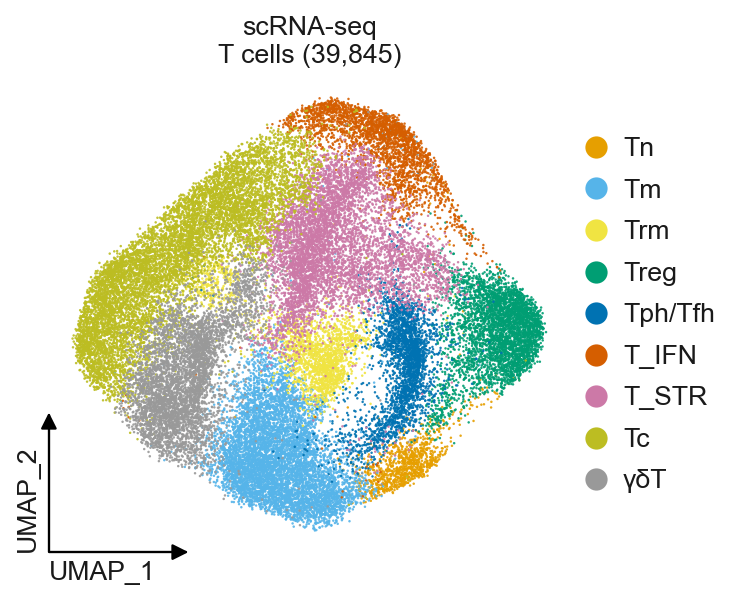

In [5]:
ax = dimplot(T_adata, groupby="subtype", arrow=True,  dot_size=5,palette=T_color)
ax.set_title(f"scRNA-seq\nT cells ({format(T_adata.obs.shape[0], ',')})")

In [6]:
B_adata = sc.read("../B_adata.h5ad")

In [7]:
Bcells_celltype_order = ["Bn","B_ABC","B_IFN","B_STR","B_preGC","Plasma"]
B_adata.obs['subtype'] = pd.Categorical(B_adata.obs['subtype'], categories=Bcells_celltype_order)

In [8]:
B_color = [ '#17BECF','#20854E', '#BC3C29','#FFDC91','#7876B1','#ff7f0e','#6F99AD','#EE4C97']

[16:28:18] 📃  add palette for `subtype` to adata.uns                                        ]8;id=777152;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=330338;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq\nB/Plasma cells (6,459)')

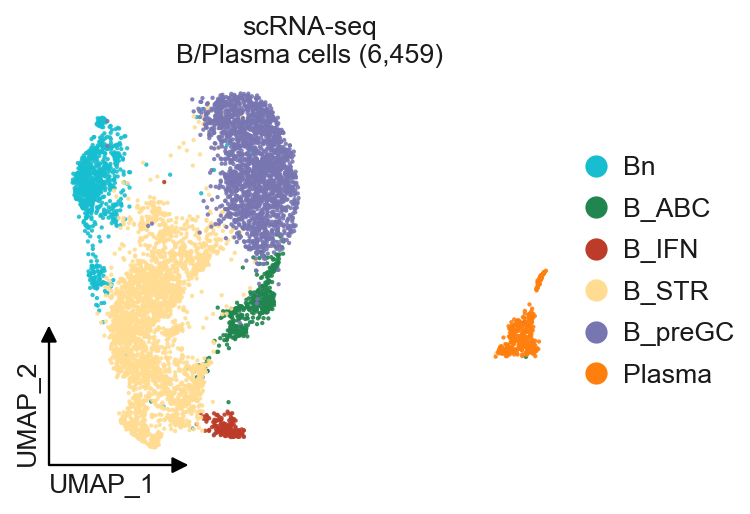

In [9]:
ax = dimplot(B_adata, groupby="subtype", arrow=True,  dot_size=15, palette=B_color)
ax.set_title(f"scRNA-seq\nB/Plasma cells ({format(B_adata.obs.shape[0], ',')})")

In [10]:
Myeloid_adata = sc.read("../Myeloid_adata.h5ad")

In [11]:
Myeloid_celltype_order = ["Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC"]
Myeloid_adata.obs['subtype'] = pd.Categorical(Myeloid_adata.obs['subtype'], categories=Myeloid_celltype_order)

In [12]:
Mac_color = ['#BFA6C9','#59a14f', '#EB5291FF', '#1794CEFF','#FBBB68FF', '#972C8DFF','#F5BACFFF', '#9DDAF5FF', '#6351A0FF',  '#9c755f',  '#BFA6C9']

[16:28:28] 📃  add palette for `subtype` to adata.uns                                        ]8;id=72296;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=183026;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq\nMacrophage/DC cells (6,208)')

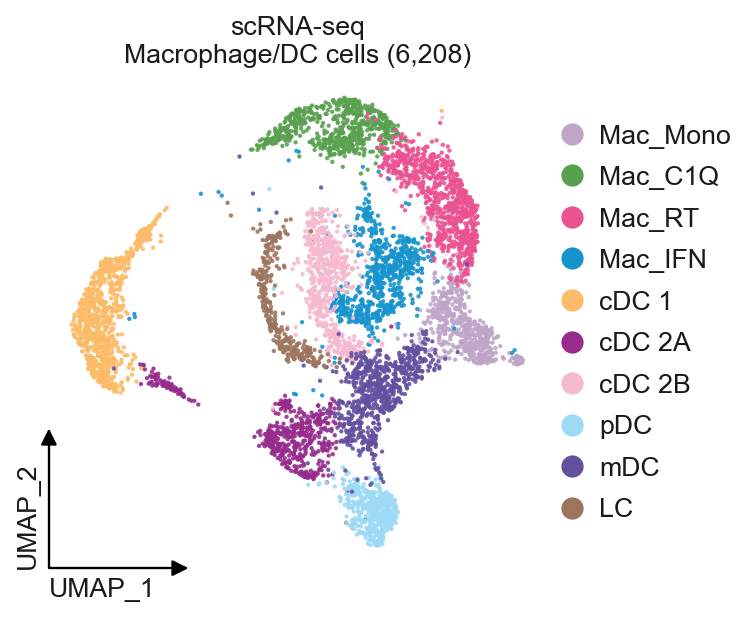

In [13]:
ax = dimplot(Myeloid_adata, groupby="subtype", arrow=True,  dot_size=15,palette=Mac_color)
ax.set_title(f"scRNA-seq\nMacrophage/DC cells ({format(Myeloid_adata.obs.shape[0], ',')})")

## Fig.5F

In [17]:
color = {
    'Tm': "#06283d",        
    'Treg': "#1363df",
    'Tph/Tfh' : "#47b5ff",
    'T_IFN': "#dff6ff",
    'Bn' : '#5D0E41',
    'B_ABC': '#A0153E',
    "B_IFN" : '#FF204E',
    'B_preGC': 'pink',
    'Plasma':'#ff7f0e',
    "Mac_IFN" : '#425f57',
    'cDC 1': '#749f82',
    "pDC" : '#a8e890',
    'Other immune cells' : '#b7b7b7'
          }

In [18]:
other_subtype = ['Tn',"Trm","T_STR","Tc","γδT",
                 "B_STR",
                 "Mac_Mono","Mac_C1Q","Mac_RT","cDC 2A","cDC 2B",'mDC',"LC", "Mac_IFN", "cDC 1","pDC", 
                ]
need_subtype = ["Tm","Treg","Tph/Tfh",'T_IFN', 'Bn', "B_ABC","B_IFN","B_preGC", 'Plasma','Other immune cells']

In [19]:
ST_adata_change_cell = ST_adata.copy()
ST_adata_change_cell.obs['subtype'] = ST_adata_change_cell.obs['subtype'].cat.add_categories(['Other immune cells'])
ST_adata_change_cell.obs.loc[ST_adata_change_cell.obs['subtype'].isin(other_subtype), 'subtype'] = 'Other immune cells'


[20:45:33] ❕  ssat is not registered, register now                                           ]8;id=888567;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=123190;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[20:45:40] ❕  ssat is not registered, register now                                           ]8;id=268723;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=832681;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[20:45:41] 📃  add palette for `subtype` to adata.uns                                        ]8;id=202520;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=613805;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

<Axes: >

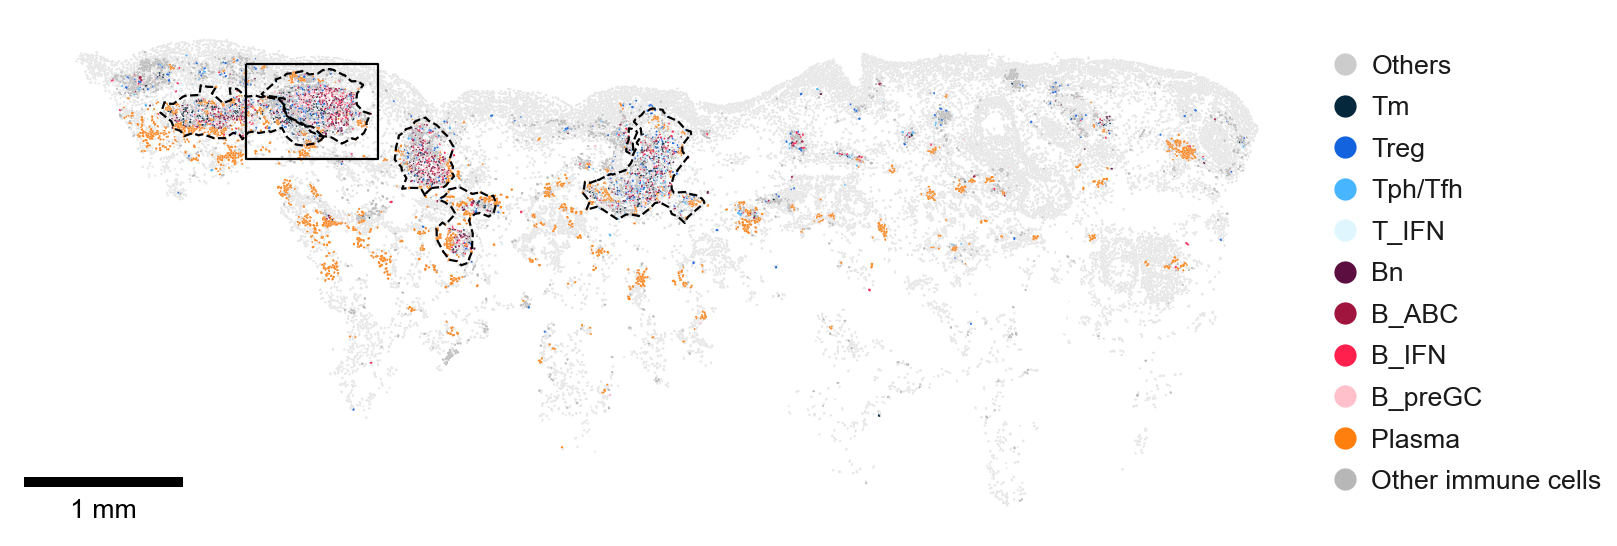

In [20]:
polygon = Polygon([[7650,17000], [9300,17000],[9300,15800], [7650,15800]]) 

samples = ["DLE4"]

Immune_celltype = ['T cells','NK cells','B cells','Plasma cells']

TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/DLE4_cell_contour.shp")
sample_adata = ST_adata[ST_adata.obs['sample'] == 'DLE4']
immune_adata = ST_adata_change_cell[ST_adata_change_cell.obs['sample'] =='DLE4']
ax = dimplot(sample_adata, background=True, height=10, reduction="contour", legend=False)
dimplot(immune_adata, background=False, height=10, reduction="contour", ax=ax, order=need_subtype, groupby='subtype',legend=True, palette = color)
draw_scalebar(ax=ax, location='lower left', color='black')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1)
gpd.GeoSeries(polygon).plot(ax=ax, facecolor='none', edgecolor='black')

[20:45:46] 📃  Filtering contour within bounding box [7700, 15800, 9250, 16950]              ]8;id=479477;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=189114;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

           📃  Filtering contour within bounding box [7700, 15800, 9250, 16950]              ]8;id=186510;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=757448;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=801837;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=703267;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[20:45:47] ❕  ssat is not registered, register now                                           ]8;id=278931;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=40083;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `subtype` to adata.uns                                        ]8;id=480082;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=80783;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

(15780.0, 16970.0)

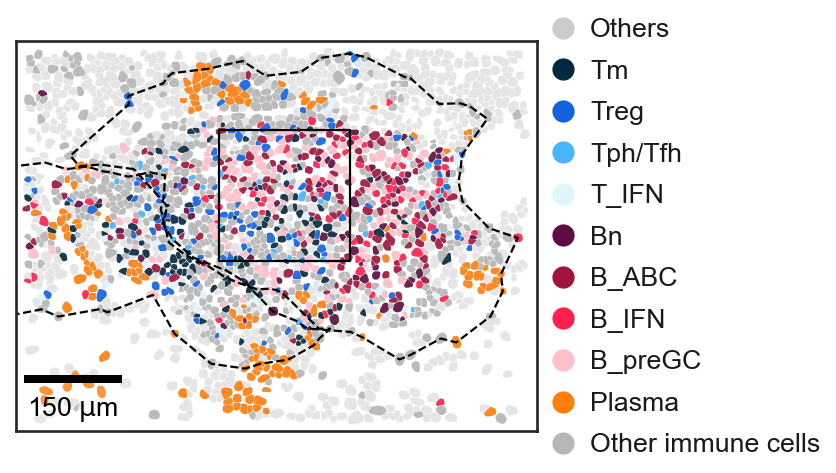

In [21]:
zone = [7700,15800,9250,16950]

polygon = Polygon([[8300,16700], [8700,16700],[8700,16300], [8300,16300]]) 

TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/DLE4_cell_contour.shp")
sample_adata = ST_adata[ST_adata.obs['sample'] == 'DLE4']
immune_adata = ST_adata_change_cell[ST_adata_change_cell.obs['sample'] =='DLE4']
zone_adata_1 = within(sample_adata, zone, reduction='contour', inplace=True)
zone_adata_2 = within(immune_adata, zone, reduction='contour', inplace=True)
ax = dimplot(zone_adata_1, background=True,  reduction="contour", legend=False)
dimplot(zone_adata_2, background=False,  reduction="contour", ax=ax,order=need_subtype, groupby='subtype',legend=True, palette = color)
draw_scalebar(ax=ax, location='lower left', color='black')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1)
gpd.GeoSeries(polygon).plot(ax=ax, facecolor='none', edgecolor='black')
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])

[20:48:17] 📃  Filtering contour within bounding box [8300, 16300, 8700, 16700]              ]8;id=198296;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=110298;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

[20:48:18] 📃  Filtering contour within bounding box [8300, 16300, 8700, 16700]              ]8;id=828723;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=234229;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=507044;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=618104;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           ❕  ssat is not registered, register now                                           ]8;id=517188;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=425861;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `subtype` to adata.uns                                        ]8;id=497676;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=87624;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

(16280.0, 16720.0)

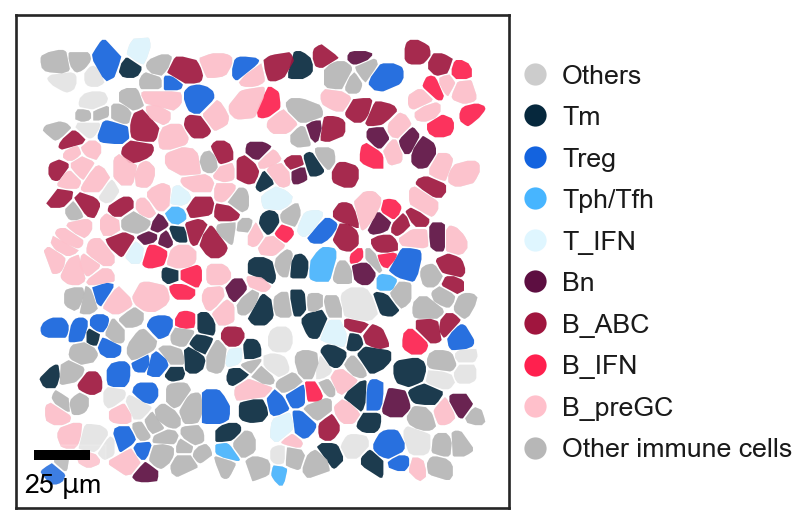

In [23]:
zone = [8300,16300,8700,16700]
sample_adata = ST_adata[ST_adata.obs['sample'] == 'DLE4']
immune_adata = ST_adata_change_cell[ST_adata_change_cell.obs['sample'] =='DLE4']
zone_adata_1 = within(sample_adata, zone, reduction='contour', inplace=True)
zone_adata_2 = within(immune_adata, zone, reduction='contour', inplace=True)
ax = dimplot(zone_adata_1, background=True,  reduction="contour", legend=False)
dimplot(zone_adata_2, background=False,  reduction="contour", ax=ax,order=need_subtype, groupby='subtype',legend=True, palette = color)
draw_scalebar(ax=ax, location='lower left', color='black')
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])
#save_fig("../../figures/Cellbin_DLE4_Immune_subtype_spatial_part_2")

## Fig.5J

In [47]:
DLE4_AUC_adata = sc.read("DLE4_add_SCENIC_AUC.h5ad")

In [48]:
DLE4_AUC_adata = DLE4_AUC_adata[(DLE4_AUC_adata.obs['Region'] == 'Der') & (DLE4_AUC_adata.obs['celltype'] == 'B cells')]

[23:32:31] 📃  Filtering contour within bounding box [9500, 15350, 10300, 16350]             ]8;id=834032;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=451026;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

           ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=5356;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=945101;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['BATF']                                                                                                

[23:32:32] ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=454632;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=16427;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['BATF']                                                                                                

           ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=52102;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=540901;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['BATF']                                                                                                

[23:32:34] ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=409558;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=733063;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['BATF']                                                                                                

           ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=313992;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=826665;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['BATF']                                                                                                

[23:32:35] ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=385170;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=396577;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['TFEB']                                                                                                

[23:32:36] ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=16576;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=329415;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['TFEB']                                                                                                

           ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=344184;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=304009;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['TFEB']                                                                                                

[23:32:37] ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=497664;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=301778;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['TFEB']                                                                                                

           ❕  The following keys are both in the .obs and .var, we will use the obs value:  ]8;id=794505;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=893220;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1760\1760]8;;\
           ['TFEB']                                                                                                

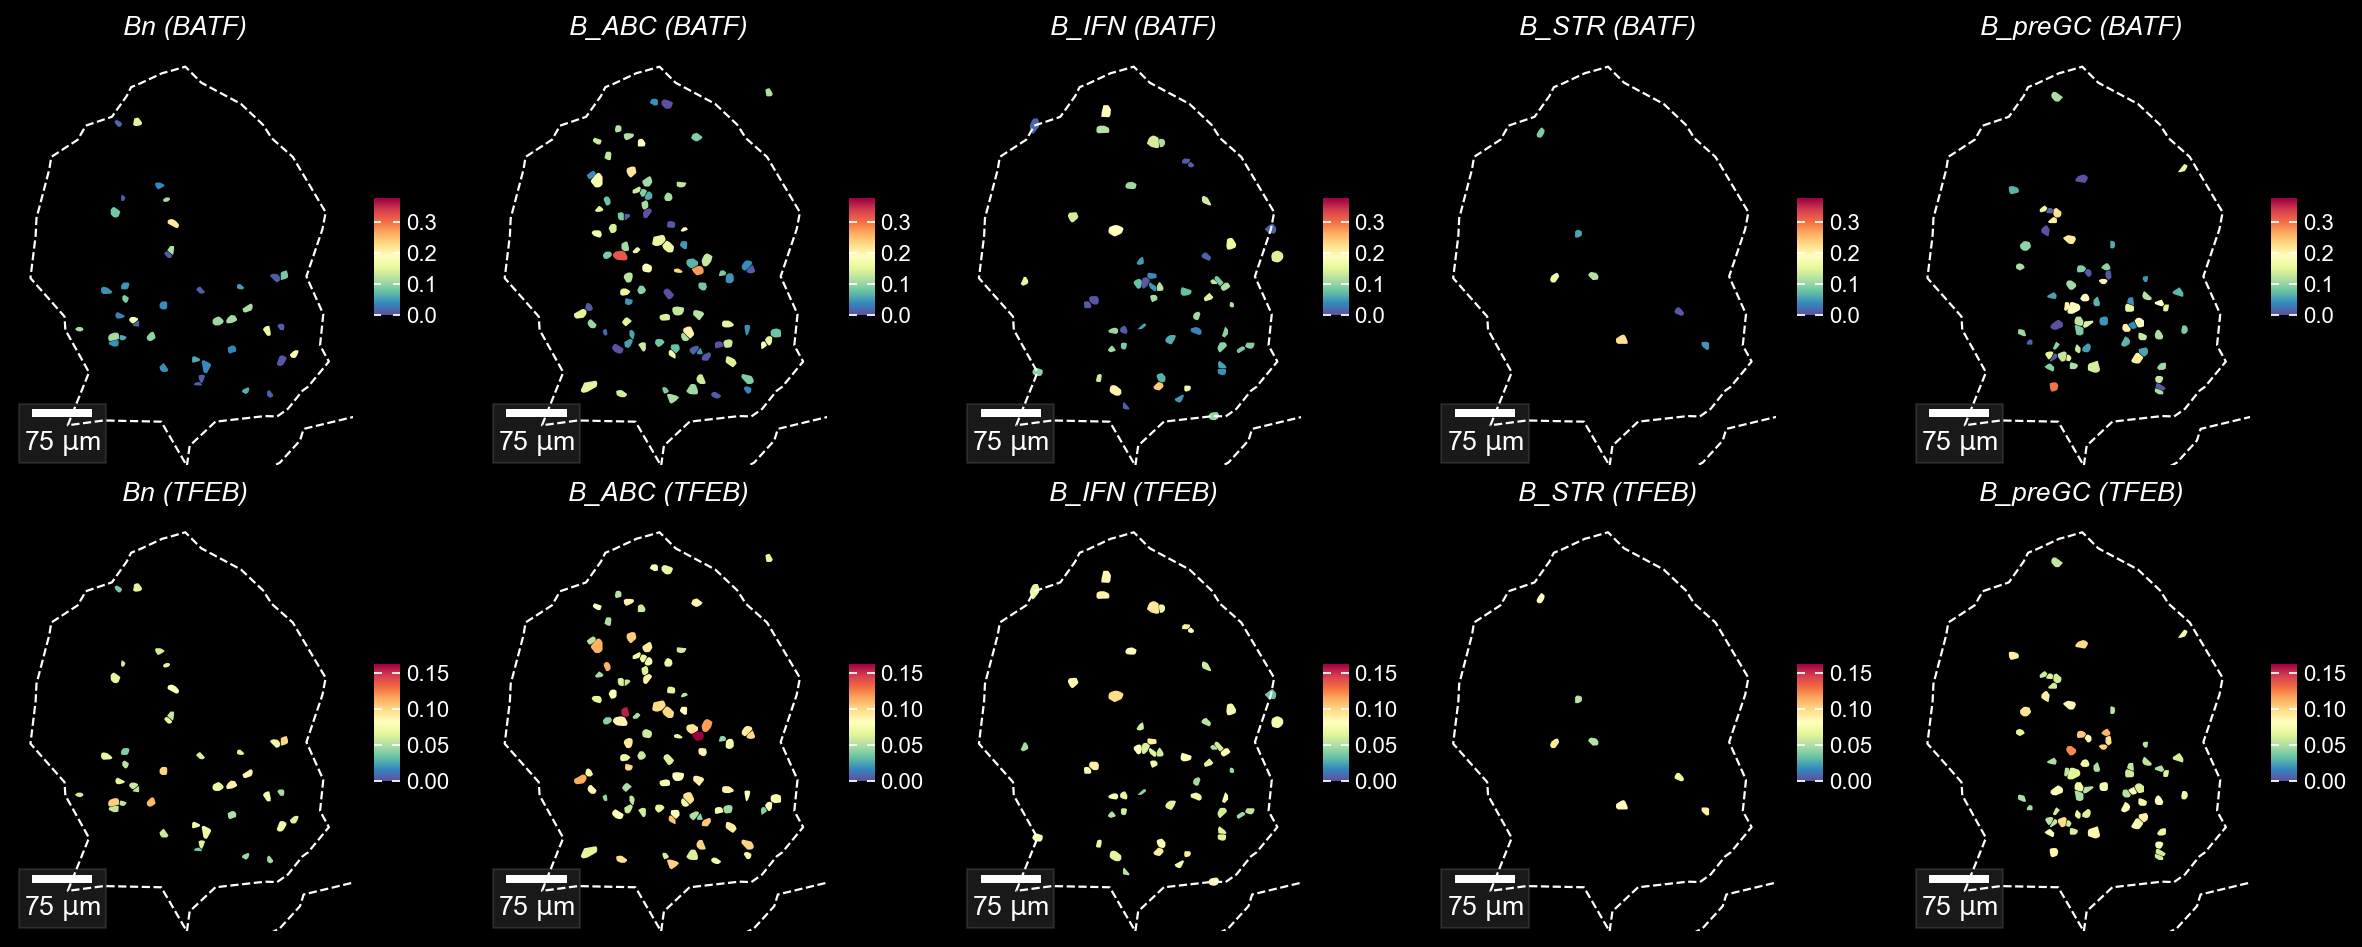

In [83]:
B_subtypes = ['Bn','B_ABC', 'B_IFN', 'B_STR', 'B_preGC']
TFs = ['BATF','TFEB']
zone = [9500,15350,10300,16350]

TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/DLE4_cell_contour.shp")
zone_adata = within(DLE4_AUC_adata, zone, reduction='contour', inplace=True)

with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(
        nrows=2,
        ncols=5,
        figsize=(3 * len(B_subtypes), 3 * len(TFs)),
        squeeze=False
    )

    for i, TF in enumerate(TFs):   
        for j, B_subtype in enumerate(B_subtypes):    
            ax = axs[i, j]

            adata = zone_adata[(zone_adata.obs['subtype'] == B_subtype)] 
            if TF == 'BATF':
                vmax = DLE4_AUC_adata.obs['BATF'].max()
            else:
                vmax = DLE4_AUC_adata.obs['TFEB'].max()
            ax = featureplot(adata, features=TF, reduction='contour',style="dark_background",raster=False,vmin=0.0, vmax=vmax, ax=ax)
            draw_scalebar(ax=ax, location='lower left', color='white')
            ax.set_title(f"{B_subtype} ({TF})")
            TLS_shp.plot(ax=ax, edgecolor='white',facecolor='none', linestyle='--', linewidth=1)
            ax.set_xlim([zone[0]-20,zone[2]+20])
            ax.set_ylim([zone[1]-20,zone[3]+20])
    #save_fig("../../figures/Cellbin_DLE4_B_subtype_TF_AUC_part")

## Fig.5M

In [34]:
zone = [20900,15300,21700,16100]

TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/SLE2_cell_contour.shp")
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']
zone_adata = within(SLE2_adata, zone, reduction='contour', inplace=True)


[20:57:55] 📃  Filtering contour within bounding box [20900, 15300, 21700, 16100]            ]8;id=491949;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=505285;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#2653\2653]8;;\

[21:04:21] 📃  add palette for `celltype` to adata.uns                                       ]8;id=364894;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py\utils_20250718.py]8;;\:]8;id=699027;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure5/utils_20250718.py#1526\1526]8;;\

(15280.0, 16120.0)

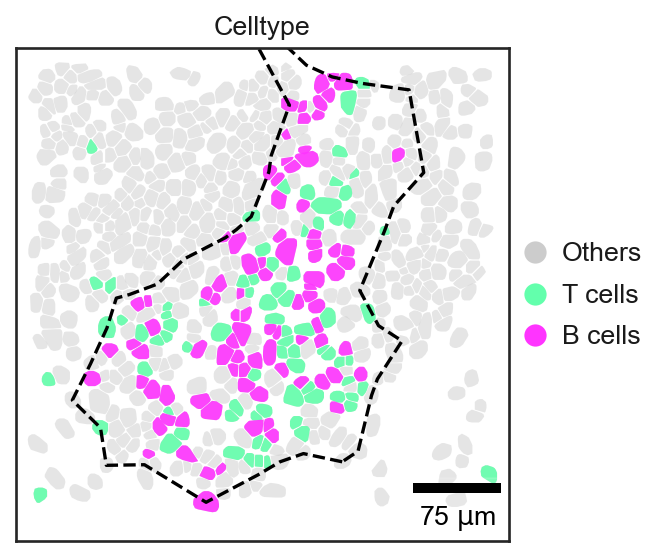

In [42]:
celltype_color = {
    "T cells" : "#63FFAC",
    "B cells" : "#FF34FF"
}

ax = dimplot(zone_adata, reduction='contour',  raster=False)
dimplot(zone_adata, reduction='contour', groupby='celltype', order=['T cells', 'B cells'], palette=celltype_color,ax=ax, raster=False)
draw_scalebar(ax=ax, location='lower right', color='black')
ax.set_title('Celltype')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1.5)
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])
#save_fig('../../figures/Cellbin_SLE2_cellchat_T_B_spatial_part')

(15280.0, 16120.0)

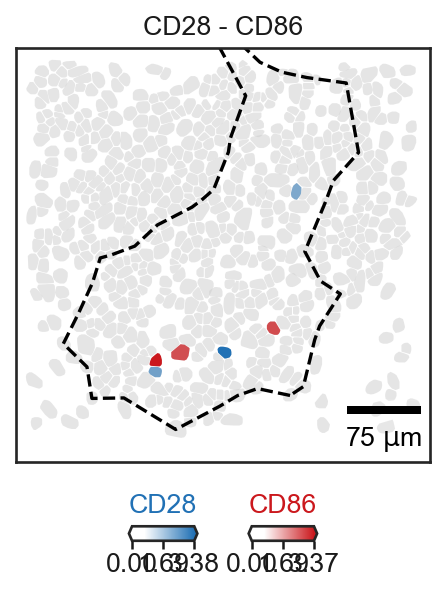

In [41]:
source_ligand = (zone_adata.obs.celltype == 'T cells') & (fetch_data(zone_adata, keys=['CD28']).sum(axis=1) > 0)
target_receptor = (zone_adata.obs.celltype == 'B cells') & (fetch_data(zone_adata, keys=['CD86']).sum(axis=1) > 0)

ax = plot_spatial(zone_adata[source_ligand | target_receptor], 
                  ['CD28','CD86'], 
                  reduction='contour', show_img=False, max_color_quantile=.95, figsize=(4,4), raster=False, 
                  style='fast', reorder_cmap=[2,1])

dimplot(zone_adata, reduction='contour', ax=ax, raster=False)
draw_scalebar(ax=ax, location='lower right', color='black')
ax.set_title('CD28 - CD86')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1.5)
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])
#save_fig('../../figures/Cellbin_SLE2_CD28_CD86_spatial_part')

(15280.0, 16120.0)

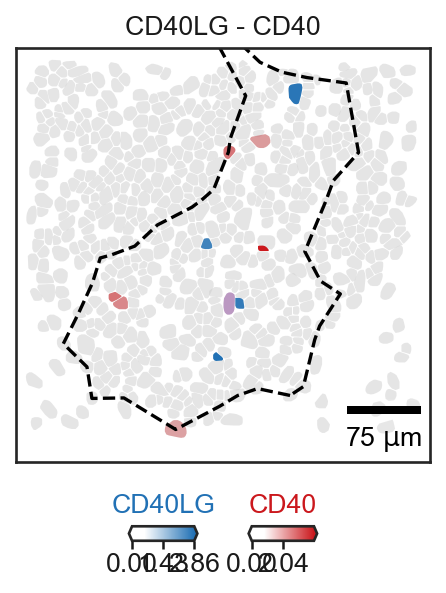

In [46]:
source_ligand = (zone_adata.obs.celltype == 'T cells') & (fetch_data(zone_adata, keys=['CD40LG']).sum(axis=1) > 0)
target_receptor = (zone_adata.obs.celltype == 'B cells') & (fetch_data(zone_adata, keys=['CD40']).sum(axis=1) > 0)

ax = plot_spatial(zone_adata[source_ligand | target_receptor], 
                  ['CD40LG','CD40'], 
                  reduction='contour', show_img=False, max_color_quantile=.95, figsize=(4,4), raster=False, 
                  style='fast', reorder_cmap=[2,1])

dimplot(zone_adata, reduction='contour', ax=ax, raster=False)
draw_scalebar(ax=ax, location='lower right', color='black')
ax.set_title('CD40LG - CD40')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1.5)
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])
#save_fig('../../figures/Cellbin_SLE2_CD40LG_CD40_spatial_part')

(15280.0, 16120.0)

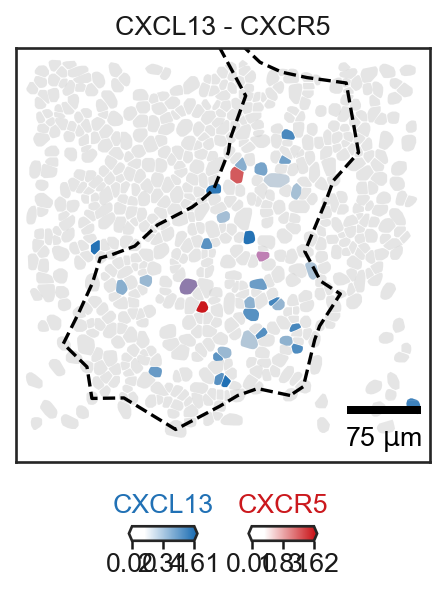

In [45]:
source_ligand = (zone_adata.obs.celltype == 'T cells') & (fetch_data(zone_adata, keys=['CXCL13']).sum(axis=1) > 0)
target_receptor = (zone_adata.obs.celltype == 'B cells') & (fetch_data(zone_adata, keys=['CXCR5']).sum(axis=1) > 0)

ax = plot_spatial(zone_adata[source_ligand | target_receptor], 
                  ['CXCL13','CXCR5'], 
                  reduction='contour', show_img=False, max_color_quantile=.95, figsize=(4,4), raster=False, 
                  style='fast', reorder_cmap=[2,1])

dimplot(zone_adata, reduction='contour', ax=ax, raster=False)
draw_scalebar(ax=ax, location='lower right', color='black')
ax.set_title('CXCL13 - CXCR5')
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1.5)
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])
#save_fig('../../figures/Cellbin_SLE2_CXCL13_CXCR5_spatial_part')